## Preparando o dataset

### Instalando dependencias 

In [52]:
!pip install kagglehub
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB 660.6 kB/s eta 0:00:14
    --------------------------------------- 0.1/8.9 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/8.9 MB 4.1 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/8.9 MB 5.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.4/8.9 MB 6.3 MB/s eta 0:00:02
   -------- ------------------------------- 1.8/8.9 MB 6.9 MB/s eta 0:00:02
   ---------- ----------------------------- 2.3/8.9 MB 7.3 MB/s eta 0:00:01
   ----------- ---------------------------- 2.5/8.9 MB 7.5 MB/s eta 0:00:01
   ----------- ---------------------------- 2.5/8.9 MB 7.5 MB/s eta 0:00:01
   ------------ --------------------------- 2.7/8.9 MB 5.9 MB/s eta 0:00:02
   -------------- -------------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohankrishnathalla/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\pedro\.cache\kagglehub\datasets\mohankrishnathalla\diabetes-health-indicators-dataset\versions\1


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('default')
sns.set_palette("husl")

dataset_path = Path(path)
csv_files = list(dataset_path.glob("*.csv"))

print("Arquivos CSV encontrados:")
for file in csv_files:
    print(f"- {file.name}")

df = pd.read_csv(csv_files[0])  
print(f"\nDataset carregado: {csv_files[0].name}")
print(f"Dimensões: {df.shape}")

Arquivos CSV encontrados:
- diabetes_dataset.csv

Dataset carregado: diabetes_dataset.csv
Dimensões: (100000, 31)


In [36]:
# 1. VISÃO GERAL DO DATASET
print("="*50)
print("VISÃO GERAL DO DATASET")
print("="*50)

print(f"Número de linhas: {df.shape[0]:,}")
print(f"Número de colunas: {df.shape[1]}")
print(f"Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nPrimeiras 5 linhas:")
print(df.head())

print("\nInformações sobre as colunas:")
print(df.info())

print("\nEstatísticas descritivas:")
print(df.describe())


VISÃO GERAL DO DATASET
Número de linhas: 100,000
Número de colunas: 31
Memória utilizada: 61.15 MB

Primeiras 5 linhas:
   age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5

In [37]:
print("\nColunas com dados faltantes:")
missing = df.isnull().sum()
print(missing[missing > 0])


Colunas com dados faltantes:
Series([], dtype: int64)


=== DISTRIBUIÇÃO DO ALVO ===
Contagem absoluta:
diagnosed_diabetes
1    59998
0    40002
Name: count, dtype: int64

Contagem relativa (%):
diagnosed_diabetes
1    60.0
0    40.0
Name: proportion, dtype: float64


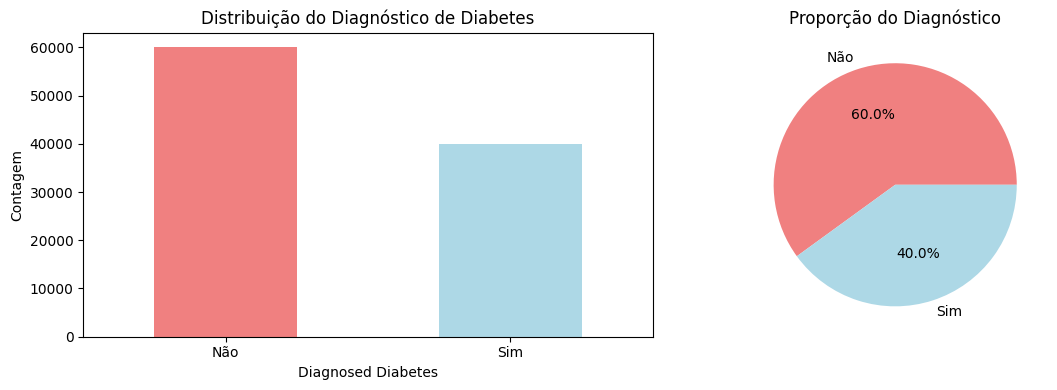


Razão de balanceamento: 0.667


In [38]:
target = 'diagnosed_diabetes'
y = df[target]

print("=== DISTRIBUIÇÃO DO ALVO ===")
print("Contagem absoluta:")
print(y.value_counts())
print("\nContagem relativa (%):")
print((y.value_counts(normalize=True) * 100).round(2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

y.value_counts().plot(kind='bar', ax=ax1, color=['lightcoral', 'lightblue'])
ax1.set_title('Distribuição do Diagnóstico de Diabetes')
ax1.set_xlabel('Diagnosed Diabetes')
ax1.set_ylabel('Contagem')
ax1.set_xticklabels(['Não', 'Sim'], rotation=0)

y.value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%', 
                      labels=['Não', 'Sim'], colors=['lightcoral', 'lightblue'])
ax2.set_title('Proporção do Diagnóstico')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

balance_ratio = y.value_counts().min() / y.value_counts().max()
print(f"\nRazão de balanceamento: {balance_ratio:.3f}")


=== DIAGNÓSTICO POR GÊNERO ===
diagnosed_diabetes      0      1     All
gender                                  
Female              20164  30052   50216
Male                19077  28694   47771
Other                 761   1252    2013
All                 40002  59998  100000

Proporção dentro de cada gênero:
diagnosed_diabetes      0      1
gender                          
Female              0.402  0.598
Male                0.399  0.601
Other               0.378  0.622


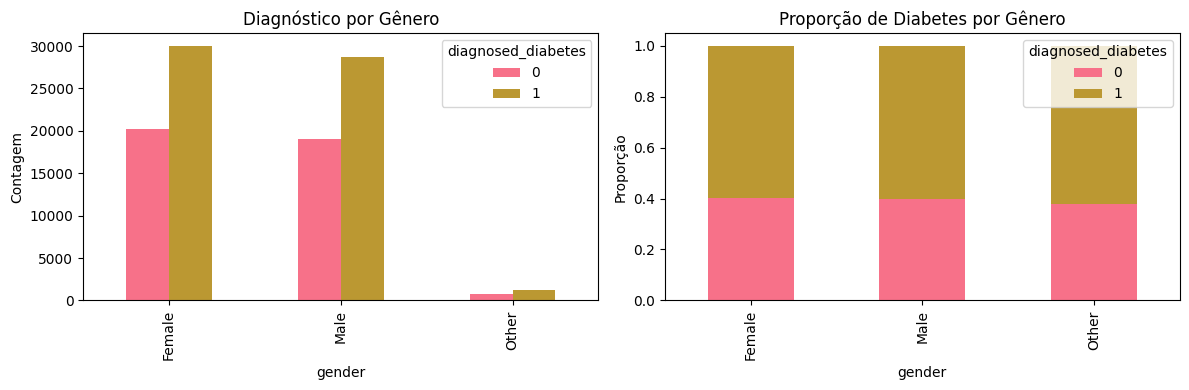

In [39]:
print("=== DIAGNÓSTICO POR GÊNERO ===")
ct_gender = pd.crosstab(df['gender'], df['diagnosed_diabetes'], margins=True)
print(ct_gender)
print("\nProporção dentro de cada gênero:")
print(pd.crosstab(df['gender'], df['diagnosed_diabetes'], normalize='index').round(3))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
pd.crosstab(df['gender'], df['diagnosed_diabetes']).plot(kind='bar', ax=ax1)
ax1.set_title('Diagnóstico por Gênero')
ax1.set_ylabel('Contagem')

pd.crosstab(df['gender'], df['diagnosed_diabetes'], normalize='index').plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Proporção de Diabetes por Gênero')
ax2.set_ylabel('Proporção')
plt.tight_layout()
plt.show()

In [40]:
from scipy.stats import chi2_contingency

ct_gender = pd.crosstab(df['gender'], df['diagnosed_diabetes'])
chi2, p_value, dof, expected = chi2_contingency(ct_gender)

print(f"Teste qui-quadrado (gênero): χ² = {chi2:.3f}, p-value = {p_value:.3f}")
if p_value > 0.05:
    print("✅ Não há diferença significativa entre gêneros (p > 0.05)")
else:
    print("❌ Há diferença significativa entre gêneros (p < 0.05)")

Teste qui-quadrado (gênero): χ² = 4.629, p-value = 0.099
✅ Não há diferença significativa entre gêneros (p > 0.05)


=== IDADE POR DIAGNÓSTICO ===
                      count  mean   std   min   25%   50%   75%   max
diagnosed_diabetes                                                   
0                   40002.0  47.5  15.3  18.0  37.0  47.0  58.0  90.0
1                   59998.0  51.9  15.5  18.0  41.0  52.0  63.0  90.0


C:\Users\pedro\AppData\Local\Temp\ipykernel_21744\1639555675.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Não', 'Sim'])


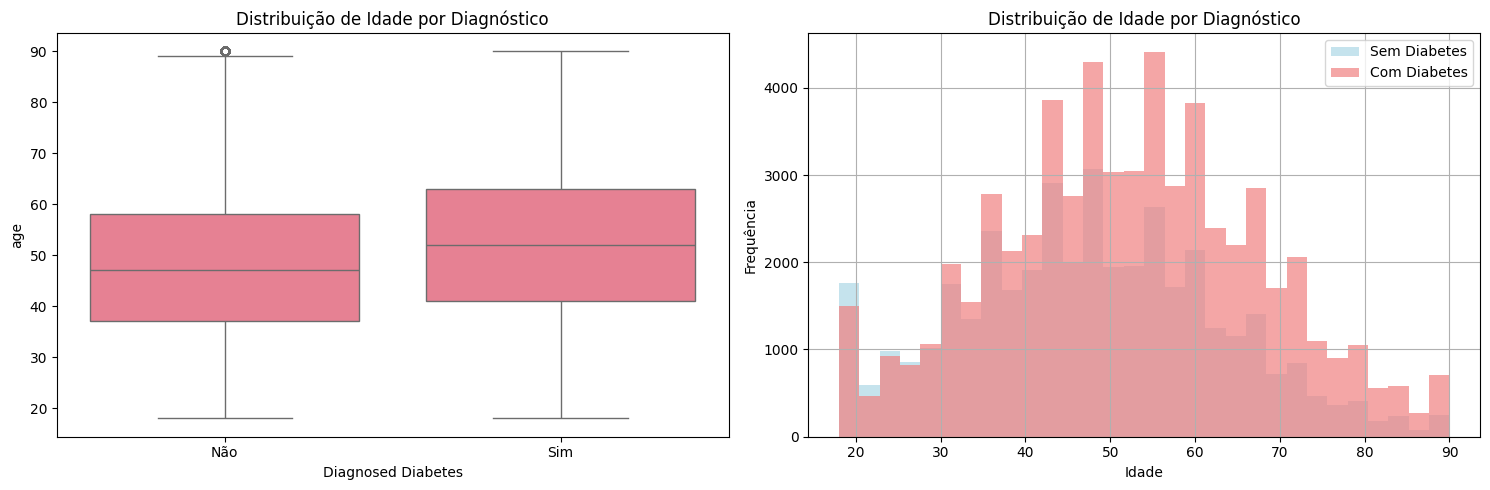

In [41]:
print("=== IDADE POR DIAGNÓSTICO ===")
age_stats = df.groupby('diagnosed_diabetes')['age'].describe().round(1)
print(age_stats)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df, x='diagnosed_diabetes', y='age', ax=ax1)
ax1.set_title('Distribuição de Idade por Diagnóstico')
ax1.set_xlabel('Diagnosed Diabetes')
ax1.set_xticklabels(['Não', 'Sim'])

df[df['diagnosed_diabetes']==0]['age'].hist(alpha=0.7, bins=30, label='Sem Diabetes', color='lightblue', ax=ax2)
df[df['diagnosed_diabetes']==1]['age'].hist(alpha=0.7, bins=30, label='Com Diabetes', color='lightcoral', ax=ax2)
ax2.set_xlabel('Idade')
ax2.set_ylabel('Frequência')
ax2.set_title('Distribuição de Idade por Diagnóstico')
ax2.legend()

plt.tight_layout()
plt.show()

=== DIAGNÓSTICO POR ETNIA ===
diagnosed_diabetes      0      1
ethnicity                       
Other               0.392  0.608
Asian               0.399  0.601
Black               0.399  0.601
White               0.399  0.601
Hispanic            0.406  0.594


<Figure size 1200x600 with 0 Axes>

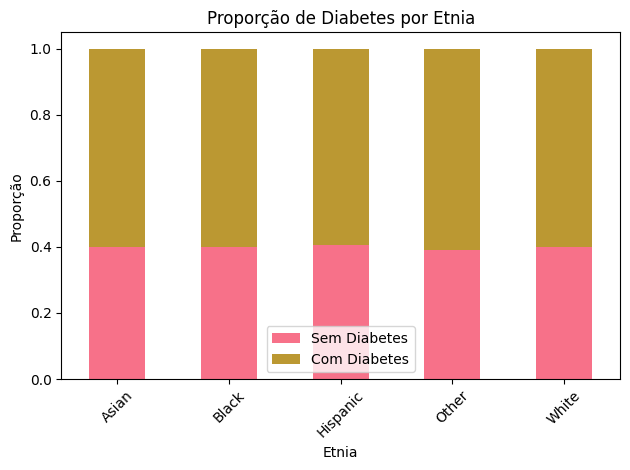

In [42]:
print("=== DIAGNÓSTICO POR ETNIA ===")
ct_ethnicity = pd.crosstab(df['ethnicity'], df['diagnosed_diabetes'], normalize='index').round(3)
print(ct_ethnicity.sort_values(1, ascending=False))

plt.figure(figsize=(12, 6))
ct_ethnicity.plot(kind='bar', stacked=True)
plt.title('Proporção de Diabetes por Etnia')
plt.ylabel('Proporção')
plt.xlabel('Etnia')
plt.xticks(rotation=45)
plt.legend(['Sem Diabetes', 'Com Diabetes'])
plt.tight_layout()
plt.show()

In [43]:
# Teste qui-quadrado para confirmar
from scipy.stats import chi2_contingency

ct = pd.crosstab(df['ethnicity'], df['diagnosed_diabetes'])
chi2, p_value, dof, expected = chi2_contingency(ct)

print(f"Teste qui-quadrado: χ² = {chi2:.3f}, p-value = {p_value:.3f}")
if p_value > 0.05:
    print("✅ Não há diferença significativa entre etnias (p > 0.05)")
else:
    print("❌ Há diferença significativa entre etnias (p < 0.05)")

Teste qui-quadrado: χ² = 4.685, p-value = 0.321
✅ Não há diferença significativa entre etnias (p > 0.05)


=== TOP 10 VARIÁVEIS MAIS CORRELACIONADAS ===
 1. hba1c                     r =  0.679 (+)
 2. glucose_postprandial      r =  0.630 (+)
 3. glucose_fasting           r =  0.511 (+)
 4. diabetes_risk_score       r =  0.277 (+)
 5. family_history_diabetes   r =  0.198 (+)
 6. age                       r =  0.138 (+)
 7. physical_activity_minutes_per_week r = -0.101 (-)
 8. bmi                       r =  0.097 (+)
 9. systolic_bp               r =  0.095 (+)
10. waist_to_hip_ratio        r =  0.079 (+)


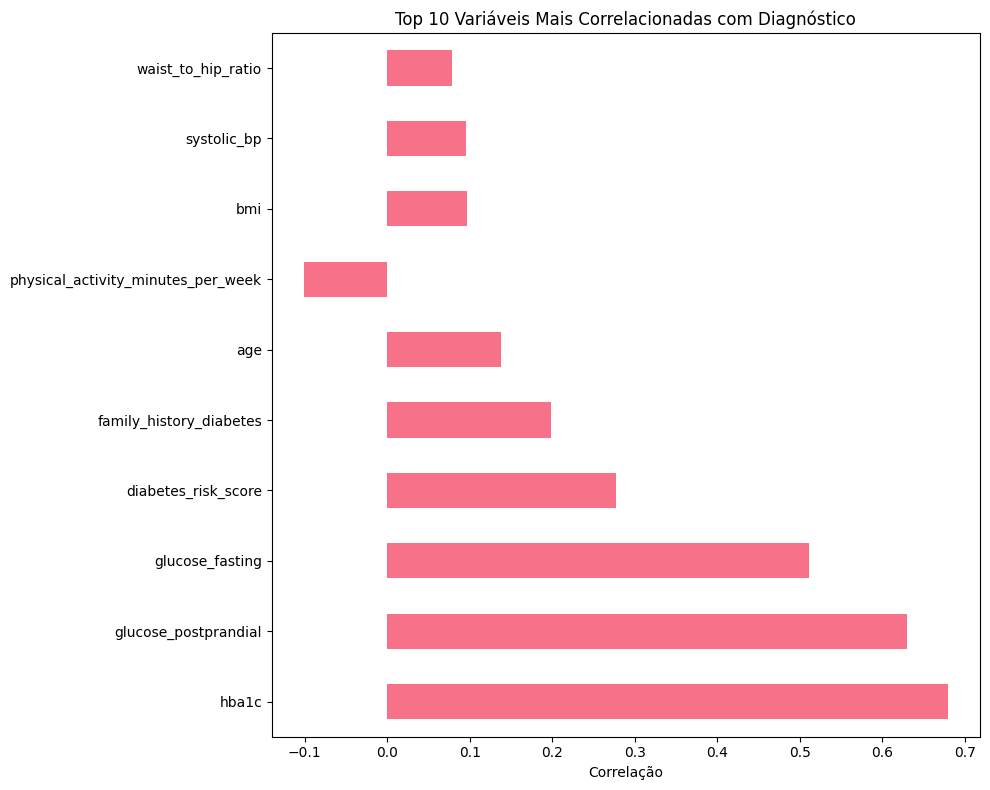

In [44]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
target_col = 'diagnosed_diabetes'

# Calcule correlação e converta para Series em uma linha
correlations = pd.Series({
    col: df[col].corr(df[target_col]) 
    for col in numeric_cols 
    if col != target_col
}).sort_values(key=abs, ascending=False)

print("=== TOP 10 VARIÁVEIS MAIS CORRELACIONADAS ===")
for i, (var, corr) in enumerate(correlations.head(10).items(), 1):
    direction = "+" if corr > 0 else "-"
    print(f"{i:2d}. {var:25s} r = {corr:6.3f} ({direction})")

# Gráfico
plt.figure(figsize=(10, 8))
correlations.head(10).plot(kind='barh')
plt.title('Top 10 Variáveis Mais Correlacionadas com Diagnóstico')
plt.xlabel('Correlação')
plt.tight_layout()
plt.show()

=== TOP 10 VARIÁVEIS MENOS CORRELACIONADAS ===
 1. sleep_hours_per_day       r = -0.000 (-)
 2. alcohol_consumption_per_week r =  0.001 (+)
 3. screen_time_hours_per_day r =  0.018 (+)
 4. heart_rate                r =  0.023 (+)
 5. hypertension_history      r =  0.028 (+)
 6. cardiovascular_history    r =  0.030 (+)
 7. diastolic_bp              r =  0.036 (+)
 8. diet_score                r = -0.044 (-)
 9. hdl_cholesterol           r = -0.051 (-)
10. triglycerides             r =  0.056 (+)


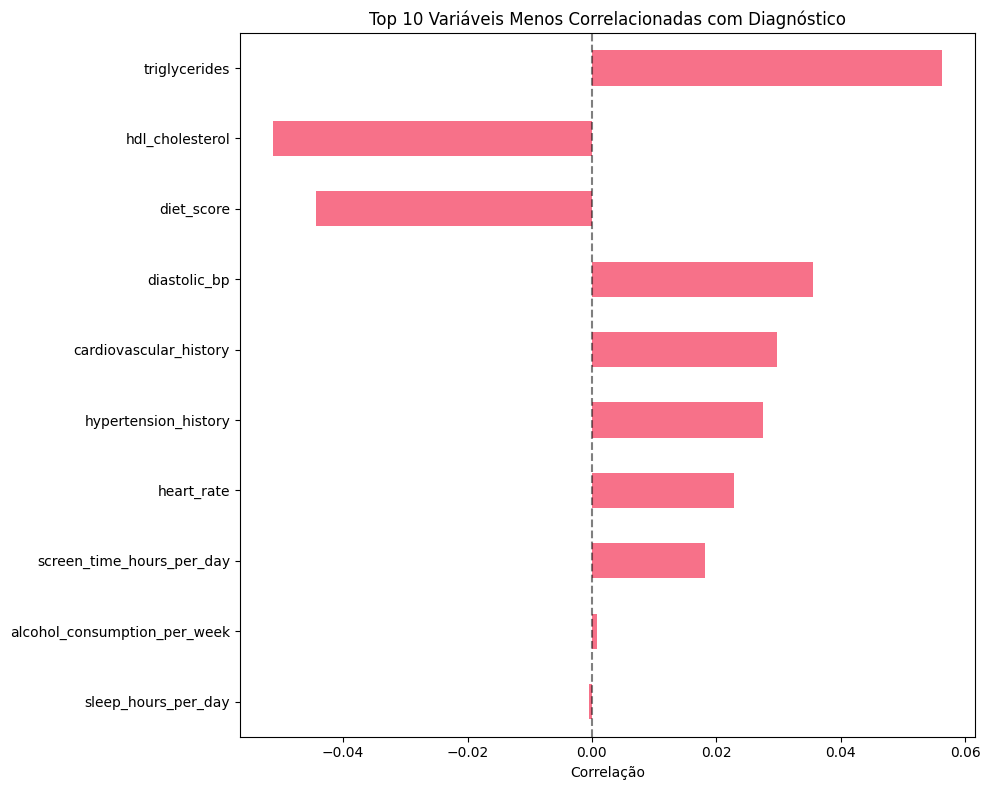


=== ANÁLISE DAS CORRELAÇÕES FRACAS ===
Variáveis com correlação muito fraca (|r| < 0.1): 16


In [45]:
# Ordena por valor absoluto em ordem CRESCENTE (menos correlacionadas primeiro)
least_correlated = correlations.sort_values(key=abs, ascending=True)

print("=== TOP 10 VARIÁVEIS MENOS CORRELACIONADAS ===")
for i, (var, corr) in enumerate(least_correlated.head(10).items(), 1):
    direction = "+" if corr > 0 else "-"
    print(f"{i:2d}. {var:25s} r = {corr:6.3f} ({direction})")

# Gráfico das menos correlacionadas
plt.figure(figsize=(10, 8))
least_correlated.head(10).plot(kind='barh')
plt.title('Top 10 Variáveis Menos Correlacionadas com Diagnóstico')
plt.xlabel('Correlação')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Análise das correlações fracas
print("\n=== ANÁLISE DAS CORRELAÇÕES FRACAS ===")
weak_corr = least_correlated[abs(least_correlated) < 0.1]
print(f"Variáveis com correlação muito fraca (|r| < 0.1): {len(weak_corr)}")


In [54]:
variables_to_remove = [
    'sleep_hours_per_day',           # r = -0.000
    'alcohol_consumption_per_week',  # r = 0.001
    'screen_time_hours_per_day',     # r = 0.018
    'heart_rate',                    # r = 0.023
    'hypertension_history',          # r = 0.028
    'cardiovascular_history',        # r = 0.030
    'diastolic_bp',                   # r = 0.036
    'smoking_status',
    'employment_status',
    'ethnicity',
    'gender'
]

existing_vars = [var for var in variables_to_remove if var in df.columns]
missing_vars = [var for var in variables_to_remove if var not in df.columns]

print("=== REMOÇÃO DE VARIÁVEIS ===")
print(f"Variáveis encontradas para remoção: {len(existing_vars)}")
print(f"Variáveis não encontradas: {len(missing_vars)}")

if missing_vars:
    print(f"Variáveis não encontradas: {missing_vars}")

# Remover as variáveis
df_cleaned = df.drop(columns=existing_vars)

# Mostrar resultado
print(f"\nDataset original: {df.shape}")
print(f"Dataset após remoção: {df_cleaned.shape}")
print(f"Variáveis removidas: {len(existing_vars)}")

# Listar as variáveis que restaram
print(f"\nVariáveis restantes: {df_cleaned.shape[1]}")
print("Colunas restantes:")
for i, col in enumerate(df_cleaned.columns, 1):
    print(f"{i:2d}. {col}")

# Verificar se ainda temos o target
if 'diagnosed_diabetes' in df_cleaned.columns:
    print(f"\n✅ Target 'diagnosed_diabetes' mantido")
else:
    print(f"\n❌ ATENÇÃO: Target 'diagnosed_diabetes' foi removido!")

# Salvar o dataset limpo (opcional)
# df_cleaned.to_csv('diabetes_dataset_cleaned.csv', index=False)
# print("\nDataset limpo salvo como 'diabetes_dataset_cleaned.csv'")

=== REMOÇÃO DE VARIÁVEIS ===
Variáveis encontradas para remoção: 11
Variáveis não encontradas: 0

Dataset original: (100000, 31)
Dataset após remoção: (100000, 20)
Variáveis removidas: 11

Variáveis restantes: 20
Colunas restantes:
 1. age
 2. education_level
 3. income_level
 4. physical_activity_minutes_per_week
 5. diet_score
 6. family_history_diabetes
 7. bmi
 8. waist_to_hip_ratio
 9. systolic_bp
10. cholesterol_total
11. hdl_cholesterol
12. ldl_cholesterol
13. triglycerides
14. glucose_fasting
15. glucose_postprandial
16. insulin_level
17. hba1c
18. diabetes_risk_score
19. diabetes_stage
20. diagnosed_diabetes

✅ Target 'diagnosed_diabetes' mantido


In [62]:
# Simular OneHot encoding para ver dimensão final
from sklearn.preprocessing import OneHotEncoder

categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns.drop('diagnosed_diabetes', errors='ignore')

print(categorical_cols)
# Calcular dimensão após OneHot
encoder = OneHotEncoder(handle_unknown='ignore', drop='if_binary')
categorical_encoded = encoder.fit_transform(df_cleaned[categorical_cols])
n_categorical_features = categorical_encoded.shape[1]

total_features = len(numeric_cols) + n_categorical_features

print(f"Features numéricas: {len(numeric_cols)}")
print(f"Features categóricas (após OneHot): {n_categorical_features}")
print(f"Total de features: {total_features}")


Index(['education_level', 'income_level', 'diabetes_stage'], dtype='object')
Features numéricas: 16
Features categóricas (após OneHot): 14
Total de features: 30


In [57]:
df_cleaned.head()

,age,education_level,income_level,physical_activity_minutes_per_week,diet_score,family_history_diabetes,bmi,waist_to_hip_ratio,systolic_bp,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Highschool,Lower-Middle,215,5.7,0,30.5,0.89,134,239,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Highschool,Middle,143,6.7,0,23.1,0.80,129,116,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Highschool,Middle,57,6.4,1,22.2,0.81,115,213,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Highschool,Low,49,3.4,0,26.8,0.88,120,171,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Graduate,Middle,109,7.2,0,21.2,0.78,92,210,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


Colunas no dataset:
['age', 'education_level', 'income_level', 'physical_activity_minutes_per_week', 'diet_score', 'family_history_diabetes', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score', 'diabetes_stage', 'diagnosed_diabetes']

Tipo de diagnosed_diabetes: int64
Valores únicos: [1 0]


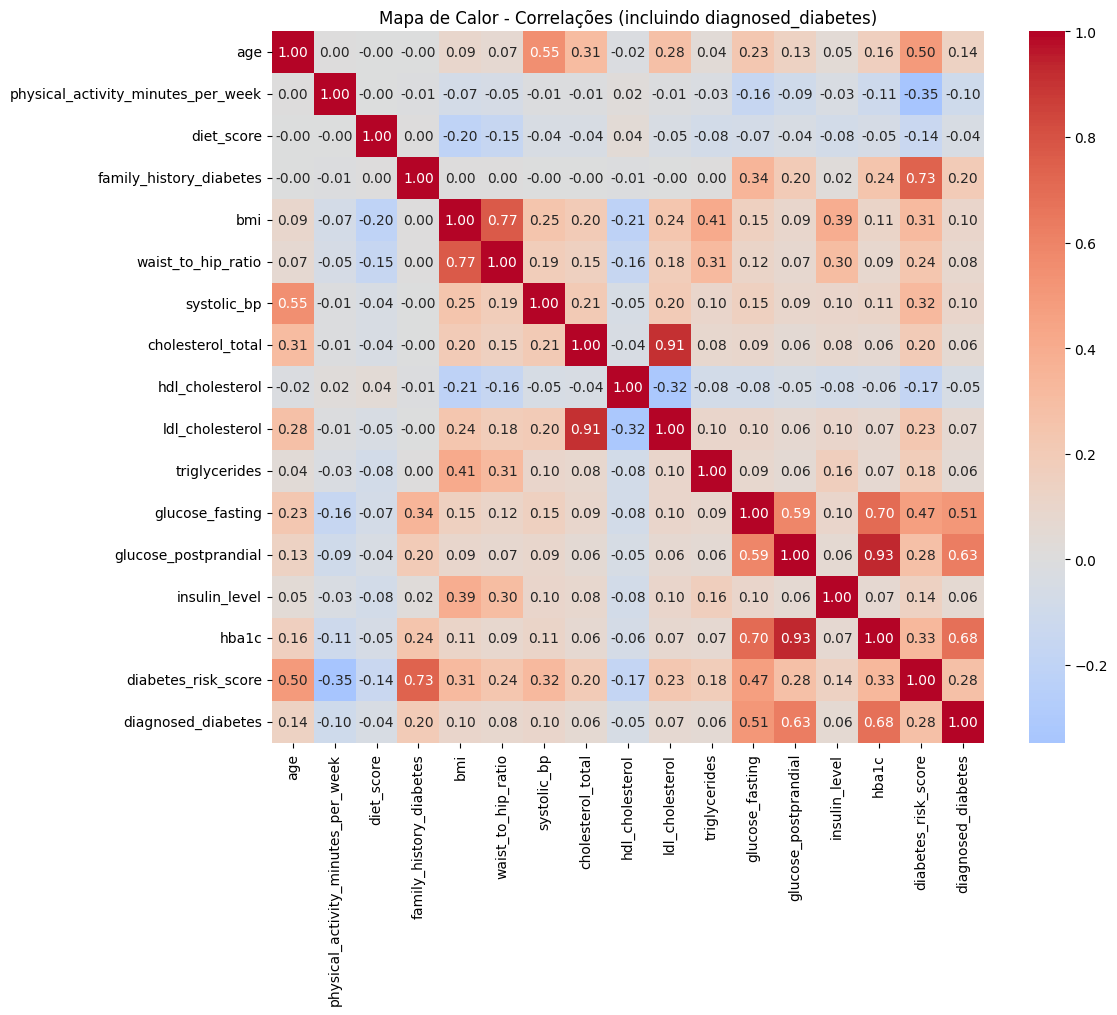

In [61]:
# 1) Verificar se diagnosed_diabetes está no dataset
print("Colunas no dataset:")
print(df_cleaned.columns.tolist())

# 2) Verificar o tipo da variável
print(f"\nTipo de diagnosed_diabetes: {df_cleaned['diagnosed_diabetes'].dtype}")
print(f"Valores únicos: {df_cleaned['diagnosed_diabetes'].unique()}")

# 3) Converter para numérico se necessário
df_cleaned['diagnosed_diabetes'] = df_cleaned['diagnosed_diabetes'].astype(int)

# 4) Agora incluir diagnosed_diabetes no heatmap
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
correlation_matrix = df_cleaned[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True)
plt.title('Mapa de Calor - Correlações (incluindo diagnosed_diabetes)')
plt.tight_layout()
plt.show()

## Notas
Analisando o mapa de calor do data frame limpo (df_cleaned), percebi que a variavel diet_score só possui correlação forte consigo mesmo, sendo assim se tornando um possível ruido para o modelo, ou uma informação desnecessaria